In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_heart = fetch_ucirepo(id=145) 
  
# data (as pandas dataframes) 
X = statlog_heart.data.features 
y = statlog_heart.data.targets 
  
# metadata 
print(statlog_heart.metadata) 
  
# variable information 
print(statlog_heart.variables) 


{'uci_id': 145, 'name': 'Statlog (Heart)', 'repository_url': 'https://archive.ics.uci.edu/dataset/145/statlog+heart', 'data_url': 'https://archive.ics.uci.edu/static/public/145/data.csv', 'abstract': 'This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 270, 'num_features': 13, 'feature_types': ['Categorical', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['heart-disease'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 09 2024', 'dataset_doi': '10.24432/C57303', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Cost Matrix\r\n\r\n_______\t abse  pres\r\nabsence\t 0\t1\r\npresence  5\t0\r\n\r\nwhere the rows represent the true values and the columns the p

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Linear kernel
svm_linear = SVC(kernel='linear', C=1.0, probability=True)
svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)

print("SVM Linear Kernel Classification Report:")
print(classification_report(y_test, y_pred_linear))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))


SVM Linear Kernel Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        33
           2       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

Confusion Matrix:
[[31  2]
 [ 4 17]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# Radial Basis Function (RBF) kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("SVM RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, probability=True)
svm_poly.fit(X_train_scaled, y_train)

y_pred_poly = svm_poly.predict(X_test_scaled)

print("SVM Polynomial Kernel Classification Report:")
print(classification_report(y_test, y_pred_poly))


SVM RBF Kernel Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        33
           2       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

SVM Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        33
           2       0.81      0.81      0.81        21

    accuracy                           0.85        54
   macro avg       0.84      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
svm_rbf_lowC = SVC(kernel='rbf', C=0.01, probability=True)
svm_rbf_lowC.fit(X_train_scaled, y_train)
print("RBF Kernel with Low C Classification Report:")
print(classification_report(y_test, svm_rbf_lowC.predict(X_test_scaled)))

svm_rbf_highC = SVC(kernel='rbf', C=100, probability=True)
svm_rbf_highC.fit(X_train_scaled, y_train)
print("RBF Kernel with High C Classification Report:")
print(classification_report(y_test, svm_rbf_highC.predict(X_test_scaled)))


RBF Kernel with Low C Classification Report:
              precision    recall  f1-score   support

           1       0.61      1.00      0.76        33
           2       0.00      0.00      0.00        21

    accuracy                           0.61        54
   macro avg       0.31      0.50      0.38        54
weighted avg       0.37      0.61      0.46        54

RBF Kernel with High C Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.76      0.76        33
           2       0.62      0.62      0.62        21

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics

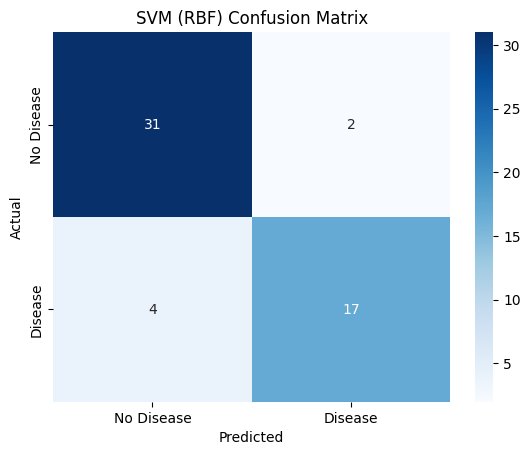

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM (RBF) Confusion Matrix')
plt.show()
